In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

In [3]:
import pandas as pd
dfX = pd.DataFrame(X)
dfY = pd.DataFrame(y)

In [4]:
dfX

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
dfY

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


The first DataFrame contains a series of measurements, each of which appears to describe specific aspects of the cell nuclei, with each feature measured at three different levels or moments.
The second DataFrame contains the Diagnosis column, which indicates whether the tumor is malignant or benign.


In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Encode categorical labels as numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Convert y to a 1D array
y = y.squeeze()

# Initialize a list to store the accuracy for each k
accuracies = []

# Define a range of k values to experiment with
k_values = [3, 5, 7, 9, 11]

for k in k_values:
    # Initialize the k-NN classifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model on the training data
    knn.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = knn.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy in the list
    accuracies.append((k, accuracy))
    
    print(f"Accuracy with k={k}: {accuracy:.4f}")

# Print a summary of all accuracies
print("\nSummary of accuracies for different k values:")
for k, acc in accuracies:
    print(f"k = {k}: Accuracy = {acc:.4f}")

Accuracy with k=3: 0.9474
Accuracy with k=5: 0.9474
Accuracy with k=7: 0.9474
Accuracy with k=9: 0.9649
Accuracy with k=11: 0.9561

Summary of accuracies for different k values:
k = 3: Accuracy = 0.9474
k = 5: Accuracy = 0.9474
k = 7: Accuracy = 0.9474
k = 9: Accuracy = 0.9649
k = 11: Accuracy = 0.9561


Based on results, k=9 seems to be the optimal value for this dataset, providing the highest accuracy.
For k=3, k=5, and k=7, the accuracy remains constant at 0.9474. This shows that for these values, the model's performance does not improve.
k=11 also shows a high accuracy of 0.9561, though slightly lower than k=9. This indicates that the accuracy stabilizes or slightly decreases as k increases beyond a certain point.

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize the k-NN classifier with the optimal k
optimal_k = 9
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [29]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9649
Precision: 0.9535
Recall: 0.9535


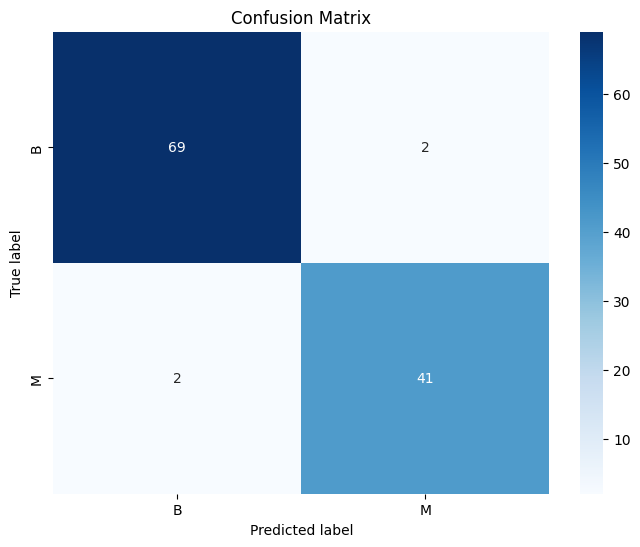

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

The high accuracy, precision, and recall suggest that the model performs very well. It correctly classifies a large majority of both positive and negative cases.
The confusion matrix shows that there are 2 false positives and 2 false negatives. This indicates that while the model is highly accurate, it still makes occasional errors.
Overall, the k-NN classifier with k=9 is a good choice for this dataset, providing a high level of accuracy and performance.